In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize


O Problema é o seguinte, eu tenho dados que se distribui como uma distribuição poissônica mas eu não sei qual o parametro estatístico que modela tal destribuição. Então primeiro vamos estimar esse parametro.

In [32]:
# Para o fim, vou criar um parametro lambda que depende de duas variaveis x e y

def lambda_function (x,y):
    return 2*x+y


In [33]:
# Vou criar um valor verdadeiro para o parametro, para conseguir gerar uma distribuição aleatoria de dados

mu_true = lamb(2,0.5)  # Valor verdadeiro do parâmetro mu
N = 50000  # Número de dados
data = np.random.poisson(mu_true, N)  # Dados Poisson


(array([3.090e+03, 5.721e+03, 8.356e+03, 9.374e+03, 8.477e+03, 6.424e+03,
        4.170e+03, 2.303e+03, 1.746e+03, 2.190e+02, 7.900e+01, 2.800e+01,
        8.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.   ,  1.125,  2.25 ,  3.375,  4.5  ,  5.625,  6.75 ,  7.875,
         9.   , 10.125, 11.25 , 12.375, 13.5  , 14.625, 15.75 , 16.875,
        18.   ]),
 <BarContainer object of 16 artists>)

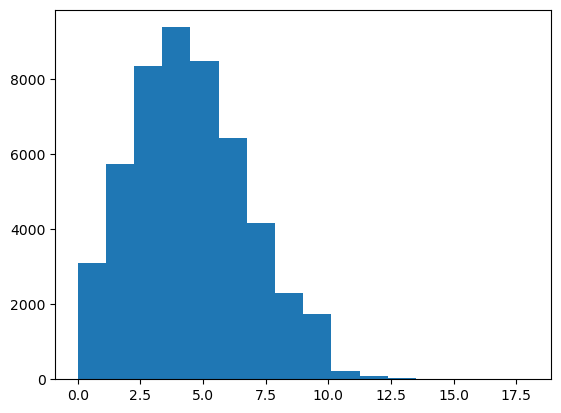

In [35]:
plt.hist(data,bins=16)

Do projeto anterior, ja sabemos estimar o parametro lambda utilizando o nosso código anterior [Estimando Parametro da distribuição de Poisson](https://github.com/LeandroMatheumatical/Inferencia-estatistica/blob/main/Likelihood_Estimation_PoissonDistribution.ipynb), agora estamos interessados em estimar as componentes do lambda e é isso que vamos fazer agora

In [75]:
def neg_log_likelihood(theta, data, fixed_theta):
    mu = lamb(theta[0], fixed_theta)
    return -np.sum(np.log(poisson.pmf(data, mu)))

In [76]:
theta_vec = np.array([2,0.5])

In [77]:
fixed_theta= 0.5

In [78]:
result = minimize(neg_log_likelihood, x0=[1], args=(data, fixed_theta), method='BFGS')

In [79]:
result

      fun: 107799.21721136814
 hess_inv: array([[2.2633466e-05]])
      jac: array([-0.00195312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 66
      nit: 4
     njev: 30
   status: 2
  success: False
        x: array([2.00197007])